# Rekomendasi Product E-commerce
## 1. Domain Proyek
*E-commerce* adalah salah satu inovasi di era modern ini yang memiliki fungsi untuk membantu konsumen membeli barang-barang yang mereka butuhkan dengan mudah melalui gawai mereka. Selain membantu konsumen, *e-commerce* juga membantu banyak penjual dalam menjual barangnya dengan lebih mudah. Dengan *e-commerce*, penjual dapat menjual barang tidak hanya terbatas kepada konsumen di daerahnya saja, tetapi penjual dapat menjual produknya ke konsumen di seluruh dunia.

Saat ini telah banyak sekali barang-barang yang dijual di *e-commerce*. Tak jarang barang-barang tersebut terdapat barang yang dijual oleh seorang penipu yang dapat merugikan konsumen. Oleh karena itu, pemilik *platform e-commerce* perlu memberikan rasa aman dan rasa nyaman kepada para konsumen dengan memfilter barang-barang yang direkomendasikan kepada user.

Selain itu, pemilik e-commerce juga perlu sebuah sistem rekomendasi yang dapat merekomendasikan barang yang sesuai dengan yang pembeli butuhkan atau pembeli inginkan. Hal ini bertujuan untuk memberikan kemudahan kepada pengguna, dan tentunya meningkatkan *trafic* dan transaksi di platform *e-commerce* tersebut. Sebagai pembeli, sistem rekomendasi dapat memberikan kemudahan bagi pembeli untuk menemukan produk yang sesuai dengan yang kita inginkan. Sebagai penjual, bisa dibilang sistem rekomendasi ini dapat mengiklankan produknya secara tepat kepada orang-orang yang benar-benar membutuhkan atau menginginkan produk tersebut.

Terdapat dua pendekatan yang umum digunakan untuk membuat sistem rekomendasi, yaitu *content-based filtering* dan *collaborative filtering*. *Content-based filtering* sangat berguna untuk diterapkan pada fitur _search engine e-commerce_. Karena *content-based filtering* ini mengandalkan _keyword_ untuk bisa memperoleh rekomendasi produk yang relevan. *Collaborative filtering* sangat berguna untuk diterapkan kepada setiap pengguna sehingga pengguna bisa dengan cepat menemukan produk yang mungkin relevan dan sedang diinginkan oleh pembeli tanpa perlu menggunakan fitur _search engine_.

## 2. Business Understanding
### 2.1. Problem Statements
Dari kondisi yang telah dijelaskan di atas, akan dibuat sebuah sistem rekomendasi untuk menjawab permasalahan berikut:
* Bagaimana cara memberikan rekomendasi produk yang relevan kepada pengguna berdasarkan preferensi dan perilaku mereka?
* Bagaimana sistem rekomendasi dapat membantu meningkatkan pengalaman belanja pengguna dan mendorong penjualan?
* Bagaimana kita dapat memanfaatkan informasi dari pengguna, produk, dan riwayat pembelian untuk menghasilkan rekomendasi yang personal dan akurat?

### 2.2. Goals
* Membuat sistem rekomendasi yang bisa memberikan rekomendasi produk yang relevan dengan preferensi pengguna.
* Mengetahui kemampuan sistem rekomendasi dalam memberikan rekomendasi produk kepada pengguna.
* Mengoptimalkan pemanfaatan data pelanggan dan produk yang ada dalam platform *e-commerce* untuk membuat sistem rekomendasi lebih akurat dan presisi.

### 2.3. Solution Approach
Untuk mencapai tujuan di atas, akan digunakan dua pendekatan dalam sistem rekomendasi kami, yaitu:
1. *Content-Based Filtering*, yang dapat memberikan rekomendasi produk yang memiliki kesamaan konden dengan produk yang disukai atau dicari oleh konsumen.
2. *Collaborative Filtering*, yang dapat memberikan rekomendasi berdasarkan preferensi konsumen atau pelanggan yang mirip.

## 3. Data Understanding
Data yang akan digunakan untuk project ini adalah data dari Kaggle yang berisi merupakan data informasi *custumer*, produk, dan *review* dari salah satu platform *e-commerce* bernama *Olist*. Data dapat diunduh melalui [tautan berikut](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce). Data ini telah diproses oleh *publisher* sehingga data ini tidak mengambil privasi konsumen maupun penjual dari *e-commerce* tersebut.

Dataset ini terdiri dari 9 skema dataset, diantaranya:
1. olist_order_customers_dataset.csv
2. olist_geolocation_dataset.csv
3. olist_order_items_dataset.csv
4. olist_order_payments_dataset.csv
5. olist_order_reviews_dataset.csv
6. olist_orders_dataset.csv
7. olist_products_dataset.csv
8. olist_seller_dataset.csv
9. product_category_name_translation.csv


# Packages Preparation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Import dari Kaggle

In [2]:
#copy dataset dari kaggle https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
!kaggle datasets download -d olistbr/brazilian-ecommerce

Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
 96% 41.0M/42.6M [00:02<00:00, 22.9MB/s]
100% 42.6M/42.6M [00:03<00:00, 14.8MB/s]


In [3]:
#extract dataset yang sudah di copy diatas ke dalam googlecolab dan folder content
import zipfile
local_zip = '/content/brazilian-ecommerce.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()


## Dataframe

Terdapat 9 skema dataset yang tersedia. Namun pada project ini hanya akan digunakan 6 skema dataset, yaitu:
1. olist_order_customers_dataset.csv
2. olist_order_items_dataset.csv
3. olist_order_reviews_dataset.csv
4. olist_orders_dataset.csv
5. olist_products_dataset.csv
6. olist_seller_dataset.csv
7. product_category_name_translation.csv

In [4]:
raw_cust = pd.read_csv('/content/olist_customers_dataset.csv')
# raw_geoloc = pd.read_csv('/content/olist_geolocation_dataset.csv')
raw_order_items = pd.read_csv('/content/olist_order_items_dataset.csv')
# raw_order_payments = pd.read_csv('/content/olist_order_payments_dataset.csv')
raw_order_reviews = pd.read_csv('/content/olist_order_reviews_dataset.csv')
raw_orders = pd.read_csv('/content/olist_orders_dataset.csv')
raw_products = pd.read_csv('/content/olist_products_dataset.csv')
raw_sellers = pd.read_csv('/content/olist_sellers_dataset.csv')
product_cats_translation = pd.read_csv('/content/product_category_name_translation.csv')

print('Dimensi data raw_cust:', raw_cust.shape,'\n\t', list(raw_cust.columns))
# print('\nDimensi data raw_geoloc:', raw_geoloc.shape, '\n\t', list(raw_geoloc.columns))
print('\nDimensi data raw_order_items:', raw_order_items.shape,'\n\t', list(raw_order_items.columns))
# print('\nDimensi data raw_order_payments:', raw_order_payments.shape, '\n\t', list(raw_order_payments.columns))
print('\nDimensi data raw_order_reviews:', raw_order_reviews.shape,'\n\t', list(raw_order_reviews.columns))
print('\nDimensi data raw_orders:', raw_orders.shape, '\n\t', list(raw_orders.columns))
print('\nDimensi data raw_products:', raw_products.shape,'\n\t', list(raw_products.columns))
print('\nDimensi data raw_sellers:', raw_sellers.shape, '\n\t', list(raw_sellers.columns))
print('\nDimensi data product_cats_translation:', product_cats_translation.shape,'\n\t', list(product_cats_translation.columns))

Dimensi data raw_cust: (99441, 5) 
	 ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

Dimensi data raw_order_items: (112650, 7) 
	 ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

Dimensi data raw_order_reviews: (99224, 7) 
	 ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']

Dimensi data raw_orders: (99441, 8) 
	 ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

Dimensi data raw_products: (32951, 9) 
	 ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

Dimensi data raw_sellers: (3095, 4) 
	 ['seller_i

# Univariate EDA

## Order customers dataset

Pertama akan dieksplorasi data customers dengan mengecek apakah ada missing value dan duplicated data.

In [5]:
raw_cust.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [6]:
raw_cust.duplicated().sum()

0

Data customers tidak ada data yang kosong dan tidak ada data duplikat.

Untuk menyederhanakan data, informasi lokasi yang digunakan hanyalah kota customers (_customer_city_)

In [7]:
raw_cust.drop(['customer_zip_code_prefix', 'customer_state'], axis=1,
              inplace=True)
raw_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_city       99441 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


Selanjutnya akan dilihat nilai unik tiap kolom.

In [8]:
print('Jumlah customers: ', len(raw_cust.customer_id.unique()))
print('Jumlah customers unik: ', len(raw_cust.customer_unique_id.unique()))
print('Jumlah kota unik:', len(raw_cust.customer_city.unique()))

Jumlah customers:  99441
Jumlah customers unik:  96096
Jumlah kota unik: 4119


<Axes: title={'center': 'Jumlah pembeli tiap kota'}, ylabel='customer_city'>

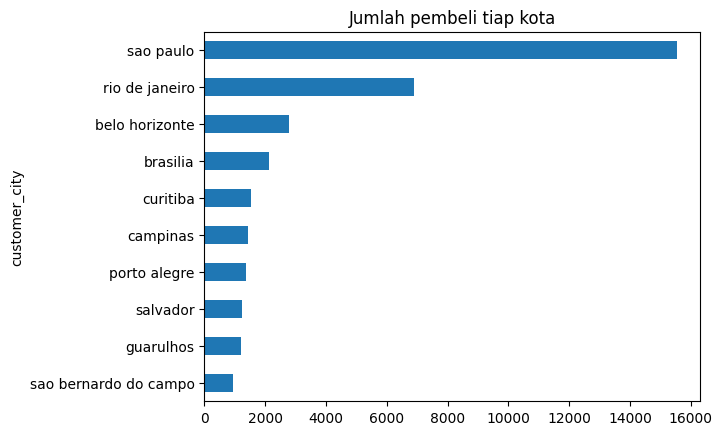

In [9]:
raw_cust.customer_city.value_counts()[:10].sort_values(ascending=True).plot(kind='barh',
                                                                            title='Jumlah pembeli tiap kota')

## Order items dataset

Seperti biasa, cek dulu kondisi data

In [10]:
raw_order_items.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [11]:
raw_order_items.duplicated().sum()

0

Kolom *shipping_limit_date* akan dihapus karena tidak akan digunakan.

In [12]:
raw_order_items.drop(['shipping_limit_date'], axis=1,
                     inplace=True)
raw_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   seller_id      112650 non-null  object 
 4   price          112650 non-null  float64
 5   freight_value  112650 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.2+ MB


Selanjutnya akan dilihat nilai unik tiap kolom.

In [13]:
print('Jumlah order_id: ', len(raw_order_items.order_id.unique()))
print('Jumlah order_item_id: ', len(raw_order_items.order_item_id.unique()))
print('Jumlah product_id: ', len(raw_order_items.product_id.unique()))
print('Jumlah seller_id: ', len(raw_order_items.seller_id.unique()))
print('Jumlah price: ', len(raw_order_items.price.unique()))
print('Jumlah freight_value: ', len(raw_order_items.freight_value.unique()))

Jumlah order_id:  98666
Jumlah order_item_id:  21
Jumlah product_id:  32951
Jumlah seller_id:  3095
Jumlah price:  5968
Jumlah freight_value:  6999


Selanjutnya akan dilihat statistik deskriptif dari kolom dengan tipe data numerik, yaitu total harga

In [14]:
raw_order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Eksplor sedikit lebih dalam variabel *order_item_id*

In [15]:
raw_order_items.order_item_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

In [16]:
raw_order_items[raw_order_items.order_item_id == 5]

,order_id,order_item_id,product_id,seller_id,price,freight_value
562,0148d3df00cebda592d4e5f966e300cc,5,ed08ea04c92f5f434c2362f7310fb328,0adac9fbd9a2b63cccaac4f8756c1ca8,5.53,11.85
1136,02a065131a2d2b72b45e2c63135606ad,5,993245facdeea0014e73a3e18750c123,1025f0e2d44d7041d6cf58b6550e0bfa,125.00,26.95
1241,02e0c2efb6d9bb2a95ca90b7e78bec1f,5,f4041d76285c2a34ad5013e8d287a400,1835b56ce799e6a4dc4eddc053f04066,39.99,12.79
1502,03705afa0a4aabe1a734ddb11c1df3f0,5,b40ec43bdfc6d6fdd65e882066a5c895,897060da8b9a21f655304d50fd935913,177.00,27.78
1597,03aba68b07658f28f29612641f08d4ba,5,e7cc48a9daff5436f63d3aad9426f28b,53243585a1d6dc2643021fd1853d8905,170.00,30.44
...,...,...,...,...,...,...
110570,fb3cf8c9eb2412b0edc0a00a8f43a869,5,4cceacaeb21aa22aa51b4c724de3758d,157c3e4b42f81ac4a44e8b1ca2fe9876,90.00,8.22
110677,fb7d6ea70e823cfb1afca3524282cbf9,5,53759a2ecddad2bb87a079a1f1519f73,1f50f920176fa81dab994f9023523100,53.90,21.35
110720,fb8e4428d340ab5bfa482ef6fc97efbc,5,53b36df67ebb7c41585e8d54d6772e08,4869f7a5dfa277a7dca6462dcf3b52b2,169.90,12.69
110895,fbf6a5df377654baa14f40156140e563,5,98a4301b1aacd45984603af55b7a1de4,1900267e848ceeba8fa32d80c1a5f5a8,53.00,13.73


In [17]:
raw_order_items[raw_order_items.order_id == '02a065131a2d2b72b45e2c63135606ad']

,order_id,order_item_id,product_id,seller_id,price,freight_value
1132,02a065131a2d2b72b45e2c63135606ad,1,993245facdeea0014e73a3e18750c123,1025f0e2d44d7041d6cf58b6550e0bfa,125.0,26.95
1133,02a065131a2d2b72b45e2c63135606ad,2,993245facdeea0014e73a3e18750c123,1025f0e2d44d7041d6cf58b6550e0bfa,125.0,26.95
1134,02a065131a2d2b72b45e2c63135606ad,3,993245facdeea0014e73a3e18750c123,1025f0e2d44d7041d6cf58b6550e0bfa,125.0,26.95
1135,02a065131a2d2b72b45e2c63135606ad,4,993245facdeea0014e73a3e18750c123,1025f0e2d44d7041d6cf58b6550e0bfa,125.0,26.95
1136,02a065131a2d2b72b45e2c63135606ad,5,993245facdeea0014e73a3e18750c123,1025f0e2d44d7041d6cf58b6550e0bfa,125.0,26.95


Kolom *order_item_id* akan dihapus karena tidak akan digunakan.

In [18]:
raw_order_items.drop('order_item_id', axis=1, inplace=True)
raw_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   product_id     112650 non-null  object 
 2   seller_id      112650 non-null  object 
 3   price          112650 non-null  float64
 4   freight_value  112650 non-null  float64
dtypes: float64(2), object(3)
memory usage: 4.3+ MB


## Order reviews dataset

In [19]:
raw_order_reviews.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [20]:
raw_order_reviews.duplicated().sum()

0

Terdapat review yang tidak menggunakan pesan atau komentar, hanya berupa skor. Namun project ini hanya akan mengambil skor review saja tanpa menggunakan pesan atau komentar reviewnya, maka kolom *review_comment_title* dan *review_comment_message* akan dihapus.

In [21]:
raw_order_reviews.drop(['review_comment_title', 'review_comment_message'],
                       axis=1, inplace=True)
raw_order_reviews.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53


Selanjutnya kolom *review_creation_date* dan *review_answer_timestamp* akan dihapus.

In [22]:
raw_order_reviews.drop(['review_creation_date', 'review_answer_timestamp'],
                       axis=1, inplace=True)

raw_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_id     99224 non-null  object
 1   order_id      99224 non-null  object
 2   review_score  99224 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


In [23]:
raw_order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


## Orders dataset

In [24]:
raw_orders.duplicated().sum()

0

In [25]:
raw_orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [26]:
raw_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


<Axes: title={'center': 'order_status'}, ylabel='order_status'>

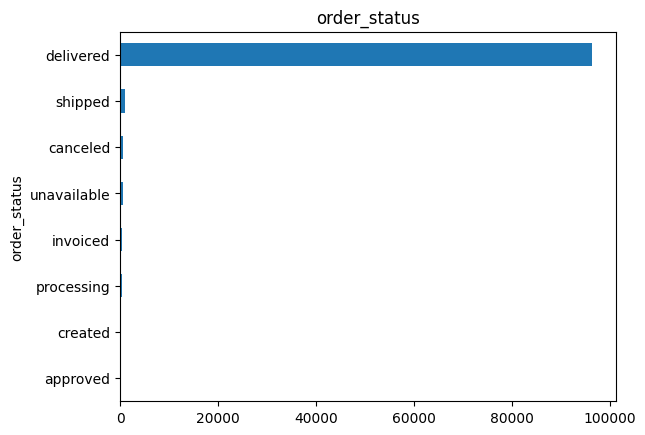

In [27]:
raw_orders.order_status.value_counts().sort_values(ascending=True).plot(kind='barh', title='order_status')

Hanya akan digunakan order yang statusnya delivered.

In [28]:
raw_orders = raw_orders[raw_orders.order_status == 'delivered']
raw_orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,14
order_delivered_carrier_date,2
order_delivered_customer_date,8
order_estimated_delivery_date,0


Karena nilai yang kosong hanya 14 baris, maka nilai yang kosong ini akan disingkirkan.

In [29]:
raw_orders.dropna(inplace=True)

<ipython-input-29-b5b09bd9547f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_orders.dropna(inplace=True)


Kolom *order_purchase_timestamp*, *order_approved_at* akan digunakan untuk membuat fitur baru lama respon penjual terhadap sebuah order

Sedangkan kolom *order_delivered_carrier_date*, *order_delivered_customer_date*, dan *order_estimated_delivery_date* akan dihapus. Begitu pula kolom *order_status* akan dihapus.

In [30]:
raw_orders.drop(['order_status',
                 'order_delivered_carrier_date',
                 'order_delivered_customer_date',
                 'order_estimated_delivery_date'],
                axis=1, inplace=True)

raw_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96455 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  96455 non-null  object
 1   customer_id               96455 non-null  object
 2   order_purchase_timestamp  96455 non-null  object
 3   order_approved_at         96455 non-null  object
dtypes: object(4)
memory usage: 3.7+ MB


<ipython-input-30-26ee771ececf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_orders.drop(['order_status',


In [31]:
raw_orders['order_purchase_timestamp'] = pd.to_datetime(raw_orders.order_purchase_timestamp,
                                                        format="%Y-%m-%d %H:%M:%S")
raw_orders['order_approved_at'] = pd.to_datetime(raw_orders.order_approved_at,
                                                 format="%Y-%m-%d %H:%M:%S")

raw_orders['respons_time_order'] = raw_orders.order_approved_at - raw_orders.order_purchase_timestamp

raw_orders.drop(['order_purchase_timestamp', 'order_approved_at'], axis=1, inplace=True)

raw_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96455 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   order_id            96455 non-null  object         
 1   customer_id         96455 non-null  object         
 2   respons_time_order  96455 non-null  timedelta64[ns]
dtypes: object(2), timedelta64[ns](1)
memory usage: 2.9+ MB


<ipython-input-31-5eea2e9e1d6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_orders['order_purchase_timestamp'] = pd.to_datetime(raw_orders.order_purchase_timestamp,


## Seller dataset

In [32]:
raw_sellers.duplicated().sum()

0

In [33]:
raw_sellers.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


Karena informasi lokasi customer yang digunakan hanya informasi kota, maka informasi lokasi seller juga hanya akan menggunakan informasi kota.

In [34]:
raw_sellers.drop(['seller_zip_code_prefix', 'seller_state'], axis=1, inplace=True)
raw_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   seller_id    3095 non-null   object
 1   seller_city  3095 non-null   object
dtypes: object(2)
memory usage: 48.5+ KB


In [35]:
print('Jumlah seller unik:', len(raw_sellers.seller_id.unique()))
print('Jumlah kota seller unik:', len(raw_sellers.seller_city.unique()))

Jumlah seller unik: 3095
Jumlah kota seller unik: 611


<Axes: title={'center': 'Top 10 kota dengan penjual terbanyak'}, ylabel='seller_city'>

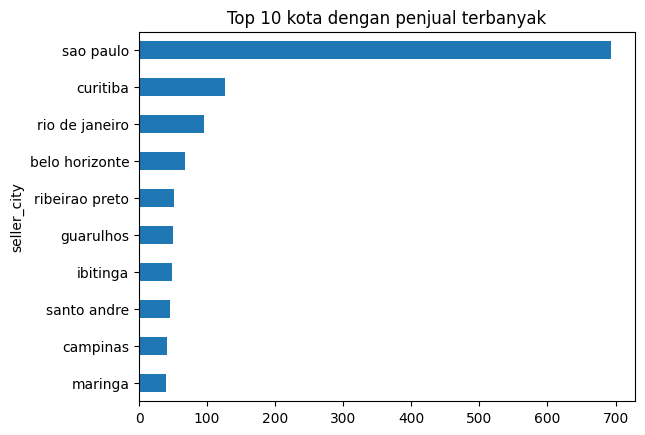

In [36]:
raw_sellers.seller_city.value_counts()[:10].sort_values(ascending=True).plot(kind='barh',
                                                                             title='Top 10 kota dengan penjual terbanyak')

## Products dataset

In [37]:
raw_products.duplicated().sum()

0

In [38]:
raw_products.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [39]:
raw_products.shape

(32951, 9)

Terdapat beberapa produk yang nama kategori, nama produk, deskripsi, dan fotonya hilang. Namun karena jumlahnya sedikit, akan dihapus saja.

Sebelum itu, akan dihapus dulu kolom *product_name_length* dan *product_description_length*.

In [40]:
raw_products.drop(['product_name_lenght', 'product_description_lenght'],
                  axis=1, inplace=True)

raw_products.dropna(inplace=True)

raw_products.isna().sum()

,0
product_id,0
product_category_name,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [41]:
raw_products.product_category_name.unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio',
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
       '

Karena kategori produk masih dalam Bahasa Portugis, agar kita lebih mudah membacanya, akan diubah menjadi Bahasa Inggris.

In [42]:
dict_product = dict(zip(product_cats_translation.product_category_name,
                        product_cats_translation.product_category_name_english))

raw_products.replace({'product_category_name': dict_product}, inplace=True)
raw_products.head()

,product_id,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,4.0,625.0,20.0,17.0,13.0


<Axes: title={'center': 'Top 10 kategori produk'}, ylabel='product_category_name'>

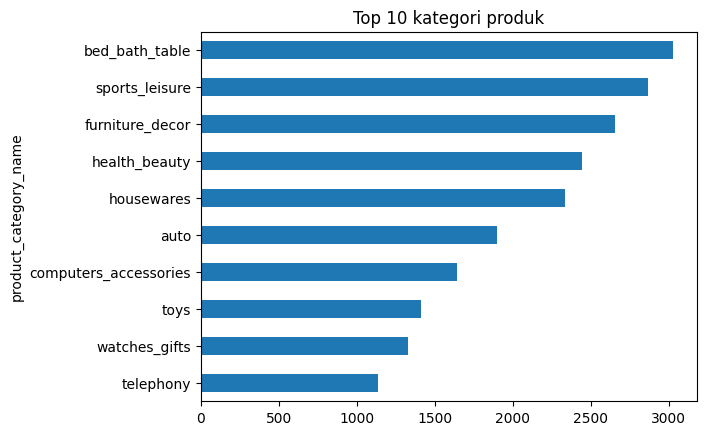

In [43]:
raw_products.product_category_name.value_counts()[:10].sort_values(ascending=True).plot(kind='barh',
                                                                                        title='Top 10 kategori produk')

# Data Preprocessing

1. customers
  * customer_id
  * customer_unique_id
  * customer_city
2. order items
  * order_id
  * product_id
  * seller_id
  * price
  * freight_value
3. order_reviews
  * review_id
  * order_id
  * review_score
  * respons_time_review
4. orders
  * order_id
  * customer_id
  * respons_time_order
5. sellers
  * seller_id
  * seller_city
6. product_id
  * product_id
  * product_category_name
  * product_photos_qty
  * product_weight_g
  * product_length_cm
  * product_height_cm
  * product_width_cm

Karena dataset tidak menyediakan nama produk dan nama seller yang asli, maka akan dibuat nama produk dan seller buatan secara random untuk mempermudah membaca produk

## Membuat nama product buatan

In [44]:
product_all = np.concatenate((
    raw_order_items.product_id.unique(),
    raw_products.product_id.unique()
))

product_all = np.sort(np.unique(product_all))

product_name = ('product_' + str(i) for i in range(len(product_all)))

product_name_dict = dict(zip(product_all, product_name))

print('Jumlah total produk unik:', len(product_name_dict))

Jumlah total produk unik: 32951


In [45]:
raw_order_items.replace({'product_id': product_name_dict}, inplace=True)
raw_products.replace({'product_id': product_name_dict}, inplace=True)
raw_order_items.head()

,order_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,product_8628,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,product_29597,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,product_25667,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,product_15322,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,product_22079,df560393f3a51e74553ab94004ba5c87,199.90,18.14


## Membuat nama seller buatan

In [46]:
seller_all = np.concatenate((
    raw_order_items.seller_id.unique(),
    raw_sellers.seller_id.unique()
))

seller_all = np.sort(np.unique(seller_all))

seller_name = {'seller_' + str(i) for i in range(len(seller_all))}

seller_name_dict = dict(zip(seller_all, seller_name))

print('Jumlah total seller unik:', len(seller_name_dict))

Jumlah total seller unik: 3095


In [47]:
raw_order_items.replace({'seller_id': seller_name_dict}, inplace=True)
raw_sellers.replace({'seller_id': seller_name_dict}, inplace=True)
raw_sellers.head()

,seller_id,seller_city
0,seller_2304,campinas
1,seller_64,mogi guacu
2,seller_738,rio de janeiro
3,seller_1547,sao paulo
4,seller_1762,braganca paulista


## Harga product

Terkadang harga produk berubah-ubah. Sehingga akan diambil harga rata-ratanya saja.

In [48]:
price_products = raw_order_items[['product_id', 'price']]

price_products = price_products.groupby('product_id').mean().reset_index()

products = pd.merge(raw_products, price_products, on='product_id', how='left')
products.sample(3)

,product_id,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price
27624,product_12343,industry_commerce_and_business,1.0,900.0,30.0,20.0,30.0,44.9
11424,product_17917,cool_stuff,1.0,600.0,40.0,5.0,30.0,106.9
18945,product_14584,housewares,1.0,1300.0,30.0,30.0,30.0,39.2


In [49]:
products.isna().sum()

,0
product_id,0
product_category_name,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0
price,0


## Review dan jumlah product terjual

In [50]:
rating_order = pd.merge(raw_order_items, raw_order_reviews[['order_id', 'review_score']],
                        on='order_id', how='left')[['product_id', 'review_score']]

rating_products = rating_order.groupby('product_id').mean().round(1).reset_index()
sold_products = rating_order.groupby('product_id').count().reset_index()

rating_sold = pd.merge(rating_products, sold_products, on='product_id',
                       how='left')

rating_sold.rename(columns={'review_score_x': 'review_score',
                            'review_score_y': 'sold'},
                   inplace=True)

products = pd.merge(products, rating_sold, on='product_id', how='left')
products.head()

,product_id,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price,review_score,sold
0,product_4053,perfumery,1.0,225.0,16.0,10.0,14.0,10.91,5.0,1
1,product_7645,art,1.0,1000.0,30.0,18.0,20.0,248.00,5.0,1
2,product_19351,sports_leisure,1.0,154.0,18.0,9.0,15.0,79.80,5.0,1
3,product_26672,baby,1.0,371.0,26.0,4.0,26.0,112.30,1.0,1
4,product_20305,housewares,4.0,625.0,20.0,17.0,13.0,37.90,5.0,1


In [51]:
products.isna().sum()

,0
product_id,0
product_category_name,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0
price,0
review_score,157
sold,0


Terdapat 157 produk yang belum memiliki review walau sudah terjual.

## Masukan nama seller ke products

In [52]:
seller_products = raw_order_items.drop_duplicates(['product_id'])[['product_id',
                                                                   'seller_id']]

products = pd.merge(products, seller_products, on='product_id', how='left')
products.head()

,product_id,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price,review_score,sold,seller_id
0,product_4053,perfumery,1.0,225.0,16.0,10.0,14.0,10.91,5.0,1,seller_1636
1,product_7645,art,1.0,1000.0,30.0,18.0,20.0,248.00,5.0,1,seller_2831
2,product_19351,sports_leisure,1.0,154.0,18.0,9.0,15.0,79.80,5.0,1,seller_594
3,product_26672,baby,1.0,371.0,26.0,4.0,26.0,112.30,1.0,1,seller_871
4,product_20305,housewares,4.0,625.0,20.0,17.0,13.0,37.90,5.0,1,seller_649


In [53]:
products.isna().sum()

,0
product_id,0
product_category_name,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0
price,0
review_score,157
sold,0


## Masukan respons time ke seller

In [54]:
respons_time_order = pd.merge(raw_order_items, raw_orders[['order_id',
                                                           'respons_time_order']],
                              on='order_id', how='left')[['seller_id', 'respons_time_order']]

respons_time_order = respons_time_order.groupby('seller_id').mean().reset_index()

products = pd.merge(products, respons_time_order, on='seller_id', how='left')
products.head()

,product_id,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price,review_score,sold,seller_id,respons_time_order
0,product_4053,perfumery,1.0,225.0,16.0,10.0,14.0,10.91,5.0,1,seller_1636,0 days 16:30:40.454545454
1,product_7645,art,1.0,1000.0,30.0,18.0,20.0,248.00,5.0,1,seller_2831,0 days 07:27:57.178947368
2,product_19351,sports_leisure,1.0,154.0,18.0,9.0,15.0,79.80,5.0,1,seller_594,0 days 05:00:58.052083333
3,product_26672,baby,1.0,371.0,26.0,4.0,26.0,112.30,1.0,1,seller_871,0 days 14:40:26.750000
4,product_20305,housewares,4.0,625.0,20.0,17.0,13.0,37.90,5.0,1,seller_649,0 days 06:47:04.588571428


# Data Preparation

In [55]:
products.isna().sum()

,0
product_id,0
product_category_name,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0
price,0
review_score,157
sold,0


Terdapat beberapa produk yang memiliki nilai review yang hilang dan respons_time_order yang hilang juga.

Untuk review score, akan diganti nilai yang hilang tersebut dengan 0.
Begitu pula untuk respons time akan diganti dengan 0.

In [56]:
products['review_score'] = products.review_score.fillna(0)
products['respons_time_order'] = products.respons_time_order.fillna(pd.Timedelta(0))
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32340 entries, 0 to 32339
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   product_id             32340 non-null  object         
 1   product_category_name  32340 non-null  object         
 2   product_photos_qty     32340 non-null  float64        
 3   product_weight_g       32340 non-null  float64        
 4   product_length_cm      32340 non-null  float64        
 5   product_height_cm      32340 non-null  float64        
 6   product_width_cm       32340 non-null  float64        
 7   price                  32340 non-null  float64        
 8   review_score           32340 non-null  float64        
 9   sold                   32340 non-null  int64          
 10  seller_id              32340 non-null  object         
 11  respons_time_order     32340 non-null  timedelta64[ns]
dtypes: float64(7), int64(1), object(3), timedelta6

In [57]:
print('jumlah product:', len(products.product_id.unique()))
print('jumlah kategori product:', len(products.product_category_name.unique()))
print('ada berapa product id yang duplikat?', products.duplicated('product_id').sum())
print('ada berapa seller id yang duplikat?', products.duplicated('seller_id').sum())

jumlah product: 32340
jumlah kategori product: 73
ada berapa product id yang duplikat? 0
ada berapa seller id yang duplikat? 29346


In [58]:
products_new = products[['product_id', 'product_category_name', 'seller_id',
                         'price', 'review_score', 'sold']]

products_new.head()

,product_id,product_category_name,seller_id,price,review_score,sold
0,product_4053,perfumery,seller_1636,10.91,5.0,1
1,product_7645,art,seller_2831,248.00,5.0,1
2,product_19351,sports_leisure,seller_594,79.80,5.0,1
3,product_26672,baby,seller_871,112.30,1.0,1
4,product_20305,housewares,seller_649,37.90,5.0,1


# Model Development dengan Content Based Filtering

In [59]:
data = products_new
data.sample(5)

,product_id,product_category_name,seller_id,price,review_score,sold
26336,product_2500,bed_bath_table,seller_895,76.6,4.0,1
15834,product_9857,consoles_games,seller_2603,454.0,4.0,1
805,product_32666,auto,seller_1492,78.9,4.0,1
20658,product_10117,health_beauty,seller_1497,39.9,4.0,5
9102,product_6935,bed_bath_table,seller_2086,99.9,4.0,1


## TF-IDF Vectorizer

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada nama kategori produk
tf.fit(data['product_category_name'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['agro_industry_and_commerce', 'air_conditioning', 'art',
       'arts_and_craftmanship', 'audio', 'auto', 'baby', 'bed_bath_table',
       'books_general_interest', 'books_imported', 'books_technical',
       'cds_dvds_musicals', 'christmas_supplies', 'cine_photo',
       'computers', 'computers_accessories', 'consoles_games',
       'construction_tools_construction', 'construction_tools_lights',
       'construction_tools_safety', 'cool_stuff',
       'costruction_tools_garden', 'costruction_tools_tools',
       'diapers_and_hygiene', 'drinks', 'dvds_blu_ray', 'electronics',
       'fashio_female_clothing', 'fashion_bags_accessories',
       'fashion_childrens_clothes', 'fashion_male_clothing',
       'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach',
       'fixed_telephony', 'flowers', 'food', 'food_drink',
       'furniture_bedroom', 'furniture_decor', 'furniture_living_room',
       'furniture_mattress_and_upholstery', 'garden_tools',
       'health_beauty', 'home

In [61]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['product_category_name'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(32340, 73)

In [62]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis masakan
# Baris diisi dengan nama resto

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.product_id
).sample(22, axis=1).sample(10, axis=0)

,luggage_accessories,food,agro_industry_and_commerce,pet_shop,housewares,costruction_tools_tools,fashion_childrens_clothes,christmas_supplies,health_beauty,cool_stuff,...,books_imported,flowers,small_appliances_home_oven_and_coffee,books_technical,electronics,food_drink,consoles_games,furniture_bedroom,watches_gifts,arts_and_craftmanship
product_id,,,,,,,,,,,,,,,,,,,,,
product_17175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
product_5813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
product_6443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
product_28508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
product_310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
product_3754,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
product_23693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
product_4817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
product_26204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cosine Similarity

In [64]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [65]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama produk
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['product_id'], columns=data['product_id'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap produk
cosine_sim_df.sample(10, axis=1).sample(10, axis=0)

Shape: (32340, 32340)


product_id,product_6511,product_1106,product_11849,product_9196,product_2861,product_17393,product_9817,product_22647,product_22467,product_21556
product_id,,,,,,,,,,
product_11265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
product_5496,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
product_3795,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
product_13332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
product_21848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
product_15855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
product_27779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
product_6595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
product_13659,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Mendapatkan Rekomendasi

In [66]:
def product_recommendations(product_id, similarity_data=cosine_sim_df,
                            items=data,
                            k=5):
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,product_id].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(product_id, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [67]:
cust_id = 'product_31234'

data[data.product_id.eq(cust_id)]

,product_id,product_category_name,seller_id,price,review_score,sold
25669,product_31234,baby,seller_1739,147.9,4.0,10


In [68]:
# Mendapatkan rekomendasi restoran yang mirip dengan KFC
product_recommendations(cust_id, k=20)

,product_id,product_category_name,seller_id,price,review_score,sold
0,product_30439,baby,seller_1140,110.000000,3.5,6
1,product_23234,baby,seller_949,159.900000,5.0,1
2,product_7005,baby,seller_731,93.333333,2.7,3
3,product_1562,baby,seller_1408,48.900000,4.0,3
4,product_22053,baby,seller_1289,59.900000,5.0,1
5,product_10097,baby,seller_2197,34.900000,3.0,1
6,product_11338,baby,seller_2779,29.550000,5.0,9
7,product_17203,baby,seller_236,32.980000,5.0,3
8,product_25018,baby,seller_2639,189.900000,3.0,4
9,product_14307,baby,seller_2799,109.455556,4.3,10


# Model Development dengan Collaborative Filtering

## Data Understanding

In [69]:
# Gabungkan dataset order items, order reviews, customers, dan product
df = pd.merge(raw_order_items, raw_order_reviews, on='order_id')
df = pd.merge(df, raw_orders, on='order_id')
df = pd.merge(df, raw_cust, on='customer_id')
df = pd.merge(df, raw_products[['product_id', 'product_category_name']],
              on='product_id')
df = pd.merge(df, raw_sellers, on='seller_id')
df = pd.merge(df, rating_sold[['product_id', 'sold']], on='product_id')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108456 entries, 0 to 108455
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   order_id               108456 non-null  object         
 1   product_id             108456 non-null  object         
 2   seller_id              108456 non-null  object         
 3   price                  108456 non-null  float64        
 4   freight_value          108456 non-null  float64        
 5   review_id              108456 non-null  object         
 6   review_score           108456 non-null  int64          
 7   customer_id            108456 non-null  object         
 8   respons_time_order     108456 non-null  timedelta64[ns]
 9   customer_unique_id     108456 non-null  object         
 10  customer_city          108456 non-null  object         
 11  product_category_name  108456 non-null  object         
 12  seller_city            108456 

Menghapus beberapa kolom yang tidak berguna

In [70]:
df.drop(['order_id', 'freight_value', 'review_id','customer_id'],
        axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108456 entries, 0 to 108455
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   product_id             108456 non-null  object         
 1   seller_id              108456 non-null  object         
 2   price                  108456 non-null  float64        
 3   review_score           108456 non-null  int64          
 4   respons_time_order     108456 non-null  timedelta64[ns]
 5   customer_unique_id     108456 non-null  object         
 6   customer_city          108456 non-null  object         
 7   product_category_name  108456 non-null  object         
 8   seller_city            108456 non-null  object         
 9   sold                   108456 non-null  int64          
dtypes: float64(1), int64(2), object(6), timedelta64[ns](1)
memory usage: 8.3+ MB


## Data Preparation

In [71]:
cust_ids = df['customer_unique_id'].unique().tolist()
print('jumlah customer unik:', len(cust_ids))

# Melakukan encoding custID
user_to_user_encoded = {x: i for i, x in enumerate(cust_ids)}

# Melakukan proses encoding angka ke ke custID
user_encoded_to_user = {i: x for i, x in enumerate(cust_ids)}

jumlah customer unik: 91479


In [72]:
product_ids = df['product_id'].unique().tolist()
print('jumlah product unik:', len(product_ids))

# Melakukan encoding productID
product_to_product_encoded = {x: i for i, x in enumerate(product_ids)}

# Melakukan proses encoding angka ke ke productID
product_encoded_to_product = {i: x for i, x in enumerate(product_ids)}

jumlah product unik: 31485


In [73]:
# Mapping customer unique id ke dataframe customer
df['customer'] = df['customer_unique_id'].map(user_to_user_encoded)

# Mapping product id ke dataframe product
df['product'] = df['product_id'].map(product_to_product_encoded)

In [74]:
# Mendapatkan jumlah user
num_customers = len(user_to_user_encoded)
print(num_customers)

# Mendapatkan jumlah produk
num_products = len(product_encoded_to_product)
print(num_products)

# Nilai minimum rating
min_rating = min(df['review_score'])

# Nilai maksimal rating
max_rating = max(df['review_score'])

print('Number of User: {}, Number of Product: {}, Min Rating: {}, Max Rating: {}'.format(
    num_customers, num_products, min_rating, max_rating
))

91479
31485
Number of User: 91479, Number of Product: 31485, Min Rating: 1, Max Rating: 5


## Split Data Train dan Data Test

In [75]:
# Membuat variabel y untuk membuat rating dari hasil
y = df['review_score'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

x_train, x_val, y_train, y_val = train_test_split(df[['customer', 'product']].to_numpy(),
                                                  y,
                                                  test_size=0.2,
                                                  random_state=453)

print(x_train[:5])
print(y_train[:5])

[[31133   821]
 [20179  3345]
 [ 8639  5967]
 [48490 21046]
 [11938  2771]]
[1.   0.75 1.   1.   0.  ]


## Training

In [76]:
import tensorflow as tff

class RecommenderNet(tff.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_custs, num_products, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_custs = num_custs
    self.num_products = num_products
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_custs,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_custs, 1) # layer embedding user bias
    self.product_embedding = layers.Embedding( # layer embeddings product
        num_products,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.product_bias = layers.Embedding(num_products, 1) # layer embedding product bias

  def call(self, inputs):
    cust_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    cust_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    product_vector = self.product_embedding(inputs[:, 1]) # memanggil layer embedding 3
    product_bias = self.product_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_product = tff.tensordot(cust_vector, product_vector, 2)

    x = dot_user_product + cust_bias + product_bias

    return tff.nn.sigmoid(x) # activation sigmoid

In [77]:
model = RecommenderNet(num_customers, num_products, 50) # inisialisasi model

# model compile
model.compile(
    loss = keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[keras.metrics.RootMeanSquaredError()]
)

hist = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 32,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 0.6750 - root_mean_squared_error: 0.4213 - val_loss: 0.5969 - val_root_mean_squared_error: 0.3710
Epoch 2/100
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 0.5488 - root_mean_squared_error: 0.3391 - val_loss: 0.6121 - val_root_mean_squared_error: 0.3803
Epoch 3/100
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.5315 - root_mean_squared_error: 0.3310 - val_loss: 0.6098 - val_root_mean_squared_error: 0.3782
Epoch 4/100
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.5190 - root_mean_squared_error: 0.3235 - val_loss: 0.6119 - val_root_mean_squared_error: 0.3791
Epoch 5/100
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.5068 - root_mean_squared_error: 0.3151 - val_loss: 0.6052 - val_root_mean_squared_error: 0.3750
Epoch 6/100
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.4950 - root_mean_squared_error: 0.3090 - val_loss: 0.6022 - val_root_mean_squared_error: 0.3730
Epoch 7/100
2712/2712 ━━━━━━━━━

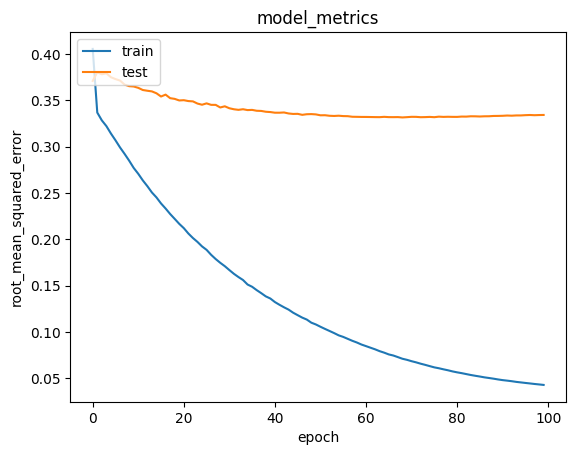

In [78]:
plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Mendapatkan Rekomendasi

In [79]:
product_df = pd.merge(raw_products,
                      raw_order_items[['product_id',
                                       'seller_id']].drop_duplicates('product_id'),
                      on='product_id', how='left')
df2 = df

# Mengambil sample user
user_id = df2.groupby('customer_unique_id').count()
user_id = user_id[user_id['product_id'] > 5].sample(1).index[0]

# user_id = df2.customer_unique_id.sample(1).iloc[0]
product_bought_by_user = df2[df2.customer_unique_id == user_id]

product_not_bought = product_df[~product_df['product_id'].isin(product_bought_by_user.product_id.values)]['product_id']
product_not_bought = list(
    set(product_not_bought)
    .intersection(set(product_to_product_encoded.keys()))
)

product_not_bought = [[product_to_product_encoded.get(x)] for x in product_not_bought]
user_encoder = user_to_user_encoded.get(user_id)
user_product_array = np.hstack(
    ([[user_encoder]] * len(product_not_bought), product_not_bought)
)

# predict rekomendasi
ratings = model.predict(user_product_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
top_ratings_indices

recommended_product_ids = [
    product_encoded_to_product.get(product_not_bought[x][0]) for x in top_ratings_indices
]

print('\nShowing recommendations for users:\n{}'.format(user_id))
print('===' * 9)

top_product_user = (
    product_bought_by_user.drop_duplicates('product_id')
    .sort_values(
        by = 'review_score',
        ascending=False
    )
    .head(5)
    .product_id.values
)

print('\n\nProduct with high reviews from user')
product_df_rows = product_df[product_df['product_id'].isin(top_product_user)]
for row in product_df_rows.itertuples():
    print(row.product_id, ':', row.product_category_name)

print('\n\nTop 10 product recommendation')

recommended_product = product_df[product_df['product_id'].isin(recommended_product_ids)]
for i, row in enumerate(recommended_product.itertuples()):
    print(i+1, '.', row.product_id, '\t:', row.product_category_name,
          '\n   ', row.seller_id)

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

Showing recommendations for users:
c0536ee7a009264e0f1bf1c8f4c54ad3


Product with high reviews from user
product_2976 : computers_accessories
product_29400 : computers_accessories


Top 10 product recommendation
1 . product_31762 	: small_appliances 
    seller_1437
2 . product_7296 	: computers_accessories 
    seller_2534
3 . product_29046 	: health_beauty 
    seller_3010
4 . product_2445 	: sports_leisure 
    seller_2836
5 . product_11647 	: fashion_bags_accessories 
    seller_1715
6 . product_31885 	: housewares 
    seller_682
7 . product_23884 	: sports_leisure 
    seller_2112
8 . product_27206 	: baby 
    seller_1289
9 . product_19238 	: bed_bath_table 
    seller_3024
10 . product_5179 	: health_beauty 
    seller_1090


In [80]:
df2[df2['customer_unique_id'] == user_id]

,product_id,seller_id,price,review_score,respons_time_order,customer_unique_id,customer_city,product_category_name,seller_city,sold,customer,product
21073,product_2976,seller_852,149.87,4,0 days 02:14:51,c0536ee7a009264e0f1bf1c8f4c54ad3,ribeirao preto,computers_accessories,itauna,30,18232,10190
21074,product_2976,seller_852,149.87,4,0 days 02:14:51,c0536ee7a009264e0f1bf1c8f4c54ad3,ribeirao preto,computers_accessories,itauna,30,18232,10190
21075,product_2976,seller_852,149.87,4,0 days 02:14:51,c0536ee7a009264e0f1bf1c8f4c54ad3,ribeirao preto,computers_accessories,itauna,30,18232,10190
21076,product_2976,seller_852,149.87,4,0 days 02:14:51,c0536ee7a009264e0f1bf1c8f4c54ad3,ribeirao preto,computers_accessories,itauna,30,18232,10190
42202,product_29400,seller_667,679.12,4,0 days 02:14:38,c0536ee7a009264e0f1bf1c8f4c54ad3,ribeirao preto,computers_accessories,sarandi,4,18232,17174
42203,product_29400,seller_667,679.12,4,0 days 02:14:38,c0536ee7a009264e0f1bf1c8f4c54ad3,ribeirao preto,computers_accessories,sarandi,4,18232,17174
